In [ ]:
!pip install orange3

In [ ]:
from tensorflow.keras import callbacks, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras.applications import InceptionV3, ResNet50V2, EfficientNetB1, DenseNet169
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.layers import Dense, Flatten, Dropout, Lambda, Input
from tensorflow.image import resize
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from Orange.evaluation import compute_CD, graph_ranks
from scipy.stats import friedmanchisquare, rankdata
import numpy as np
import pandas as pd
import tensorflow as tf
import re, os, time, requests
import matplotlib.pyplot as plt

Null hypothesis: The means of the results of two or more algorithms are the same.
[34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 19.78 34.   35.08] [34.96 1

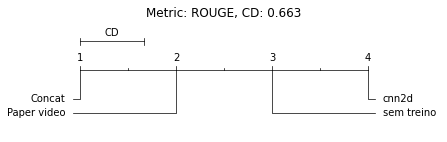

[36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28 35.95 36.23] [36.1  20.28

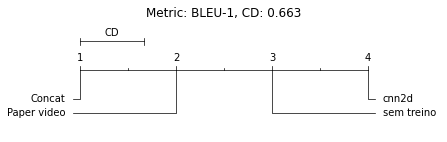

[23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38 23.04 23.32] [23.12  9.38

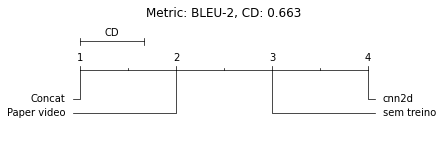

[16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6  16.78 16.91] [16.88  6.6 

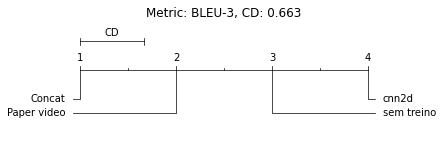

[13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25 13.35 13.37] [13.41  5.25

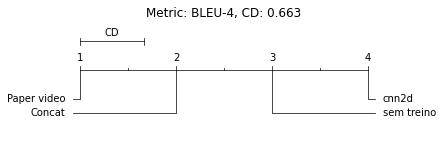

In [ ]:
print('Null hypothesis:', 'The means of the results of two or more algorithms are the same.')

DATASETS = {
    'paper': {
        'rouge': 34.96,
        'bleu1': 36.1,
        'bleu2': 23.12,
        'bleu3': 16.88,
        'bleu4': 13.41
    },
    'paper_sem_treino': {
        'rouge': 19.78,
        'bleu1': 20.28,
        'bleu2': 9.38,
        'bleu3': 6.6,
        'bleu4': 5.25
    },
    'TSPNet-HF(Features Concatenadas)': {
        'rouge': 34,
        'bleu1': 35.95,
        'bleu2': 23.04,
        'bleu3': 16.78,
        'bleu4': 13.35
    },
    'TSPNet-HF(Features Concatenadas 100Ep)': {
        'rouge': 34.61,
        'bleu1': 36.21,
        'bleu2': 23.28,
        'bleu3': 16.95,
        'bleu4': 13.37
    },
    'TSPNet-HF(Merged AVG Pooling - Not Aligned)': {
        'rouge': 35.08,
        'bleu1': 36.23,
        'bleu2': 23.32,
        'bleu3': 16.91,
        'bleu4': 13.37
    },
    'Merged AVG Pooling': {
        'rouge': 35.58,
        'bleu1': 36.85,
        'bleu2': 23.9,
        'bleu3': 17.42,
        'bleu4': 13.74
    },
    'Merged Sum': {
        'rouge': 34.85,
        'bleu1': 35.92,
        'bleu2': 23.1,
        'bleu3': 16.7,
        'bleu4': 13.07
    },
    'Merged Max Pooling': {
        'rouge': 34.3,
        'bleu1': 35.61,
        'bleu2': 22.7,
        'bleu3': 16.39,
        'bleu4': 12.82
    },
    'Merged Media Simples': {
        'rouge': 35.53,
        'bleu1': 35.99,
        'bleu2': 23.43,
        'bleu3': 17.14,
        'bleu4': 13.49
    },
    'Merged Media Ponderada': {
        'rouge': 34,
        'bleu1': 35,
        'bleu2': 20,
        'bleu3': 16,
        'bleu4': 13
    }
}


objectives = ['Accuracy', 'F1-Score']
alpha = 0.05

'''
DATASETS = []
#paper = [34.96, 36.1, 23.12, 16.88, 13.41]
sap = [0.96, 0.16]
random = [0.9, 0.12]
nearMiss = [0.87, 0.11]
ROS = [0.84, 0.12]
RUS = [0.92, 0.14]


#DATASETS.append(paper)
DATASETS.append(sap)
DATASETS.append(random)
DATASETS.append(nearMiss)
DATASETS.append(ROS)
DATASETS.append(RUS)

names = ['SAP', 'RandomSearch', 'NearMiss', 'ROS', 'RUS']

'''

objectives = ['ROUGE', 'BLEU-1', 'BLEU-2', 'BLEU-3', 'BLEU-4']
alpha = 0.05

DATASETS = []
paper = [34.96, 36.1, 23.12, 16.88, 13.41]
paper_sem_treino = [19.78, 20.28, 9.38, 6.6, 5.25]
TSPNet_HF_Features_Concatenadas = [34, 35.95, 23.04, 16.78, 13.35]
TSPNet_HF_Features_Concatenadas_100ep = [34.61, 36.21, 23.28, 16.95, 13.37]
TSPNet_HF_Merged_AVG_Pooling_Not_Aligned = [35.08, 36.23, 23.32, 16.91, 13.37]


'''
#MC1
paper_video = [98, 7]
cnn2d = [91, 7]
Merged_AVG_Pooling = [94, 0]
Merged_Sum = [92, 3]
Merged_Max_Pooling = [95, 0]
SMOTE = [92, 3]
Tomek = [98, 0]
ENN = [98, 0]
OSS = [98, 0]
baseline = [96, 3

#shuttle
paper_video = [99, 93]
cnn2d = [99, 82]
Merged_AVG_Pooling = [70, 9]
Merged_Sum = [99, 93]
Merged_Max_Pooling = [86, 75]
SMOTE = [99, 93]
Tomek = [99, 86]
ENN = [99, 86]
OSS = [99, 86]
baseline = [97, 75]



#mammography
paper_video = [98, 60]
cnn2d = [92, 52]
Merged_AVG_Pooling = [31, 8]
Merged_Sum = [95, 51]
Merged_Max_Pooling = [91, 38]
SMOTE = [95, 53]
Tomek = [98, 57]
ENN = [98, 57]
OSS = [98, 57]
baseline = [92, 51]

#compustat
paper_video = [94, 17]
cnn2d = [90, 10]
Merged_AVG_Pooling = [74, 13]
Merged_Sum = [74, 13]
Merged_Max_Pooling = [78, 13]
SMOTE = [74, 13]
Tomek = [96, 0]
ENN = [96, 0]
OSS = [96, 0]
baseline = [73, 13]

#letter
paper_video = [99, 96]
cnn2d = [99, 91]
Merged_AVG_Pooling = [99, 85]
Merged_Sum = [99, 93]
Merged_Max_Pooling = [98, 79]
SMOTE = [99, 93]
Tomek = [99, 93]
ENN = [99, 93]
OSS = [99, 93]
baseline = [97, 93]

#covtype
paper_video = [88, 56]
cnn2d = [85, 50]
Merged_AVG_Pooling = [78, 32]
Merged_Sum = [88, 50]
Merged_Max_Pooling = [83, 42]
SMOTE = [88, 50]
Tomek = [93, 1]
ENN = [93, 1]
OSS = [93, 1]
baseline = [78, 36]
'''

DATASETS.append(paper)
#DATASETS.append(paper_video)
#DATASETS.append(cnn2d)
DATASETS.append(paper_sem_treino)
DATASETS.append(TSPNet_HF_Features_Concatenadas)
#DATASETS.append(TSPNet_HF_Features_Concatenadas_100ep)
DATASETS.append(TSPNet_HF_Merged_AVG_Pooling_Not_Aligned)

'''
DATASETS.append(Merged_AVG_Pooling)
DATASETS.append(Merged_Sum)
DATASETS.append(Merged_Max_Pooling)
DATASETS.append(SMOTE)
DATASETS.append(Tomek)
DATASETS.append(ENN)
DATASETS.append(OSS)
DATASETS.append(baseline)
'''
#names = ['SAP', 'RandomSearch','NearMiss', 'ROS', 'RUS', 'SMOTE', 'TomekLinks', 'ENN', 'OSS', 'Baseline']

names = ['Paper video', 'cnn2d','sem treino', 'Concat', 'Avg']

import random

for i in range(len(objectives)):
  df = pd.DataFrame()

  for j in range(len(DATASETS)):
    value = DATASETS[j][i]
    results = [value]*50
    #for x in range(len(results)):
    #  results[x] += (random.randint(0,9)+1)/100
    df[names[j]] = results

  values = df.values
  names = df.columns 

  print(*values)

  #friedman = friedmanchisquare(sap, random, nearMiss, ROS, RUS)
  friedman = friedmanchisquare(paper, paper_sem_treino, TSPNet_HF_Features_Concatenadas, TSPNet_HF_Merged_AVG_Pooling_Not_Aligned)
  #friedman = friedmanchisquare(*values)
  ranks = np.array([rankdata(-p) for p in values])
  average_ranks = np.mean(ranks, axis = 0)

  cd = compute_CD(average_ranks, n=len(df), alpha=str(alpha), test='nemenyi')
    
  print('\t', 'null hypothesis:', 'rejected' if friedman.pvalue < alpha else 'accepted')
  print('\t', 'p-value:', friedman.pvalue)
  print('\t', 'ranking:', average_ranks)
  print('\t', 'names:', list(names))
  print('\t', 'cd:', cd)
  
  graph_ranks(average_ranks, names=names, cd=cd)
  # title = f'Friedman-Nemenyi (CD = {round(cd, 3)})'
  title = f'Metric: {objectives[i]}, CD: {round(cd, 3)}'
  plt.title(title)
  #plt.savefig(f'/content/cd_{dataset}_{objective}.pdf', bbox_inches='tight')
  plt.show()


In [ ]:
!tar -cvzf plots.tar.gz /content/*.pdf